# CrateBot Requirements

This document records the requirements for the Cratebot, a robot designed to pick-up, carry and deposit a single crate containing goods.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from robot_functions import *

In [2]:
# Cargo
crate_mass_in_kg = 25.0

crate_length_in_meters = 0.520
crate_width_in_meters = 0.350
crate_height_in_meters = 0.268

crate_data = [["Maximum weight (kg)", crate_mass_in_kg],
              ["Length (m)", crate_length_in_meters],
              ["Width (m)", crate_width_in_meters],
              ["Height (m)", crate_height_in_meters]]
pd.DataFrame(crate_data, columns=["Crate information", "Value"])


,Crate information,Value
0,Maximum weight (kg),25.000
1,Length (m),0.520
2,Width (m),0.350
3,Height (m),0.268


In [3]:
# Rover
max_velocity_flat = 4.0
max_acceleration_flat = 1.0

max_velocity_hill = 2.0
max_acceleration_hill = 0.5

max_hill_angle_empty = 45.0
max_hill_angle_max_load = 30.0

battery_life_in_hours = 5.0

# Electrical
battery_to_controller_efficiency = 0.95
controller_to_motor_efficiency = 0.96
motor_efficiency = 0.92
motor_gear_efficiency = 0.93
number_of_gears = 5

# Dimensions
wheel_radius = 0.075

rover_mass_in_kg = 20.0

rover_length = 1.0
rover_width = crate_width_in_meters + 0.30
rover_height = wheel_radius * 2 + crate_height_in_meters + 0.10

number_of_wheels = 6

# random

coefficient_of_friction_max = 1.00
coefficient_of_friction = 0.25
coefficient_of_aerodynamic_drag = 1.00

# Output

rover_data = [
    ["Maximum speed on the flat (m/s)", max_velocity_flat],
    ["Maximum acceleration on the flat (m/s)", max_acceleration_flat],
    ["Maximum speed on a hill (m/s)", max_velocity_hill],
    ["Maximum acceleration on a hill (m/s)", max_acceleration_hill],
    ["Maximum hill angle without load (degrees)", max_hill_angle_empty],
    ["Maximum hill angle with load (degrees)", max_hill_angle_max_load],
    ["Battery life (hours)", battery_life_in_hours]
]
pd.DataFrame(rover_data, columns=["Rover information", "Value"])


,Rover information,Value
0,Maximum speed on the flat (m/s),4.0
1,Maximum acceleration on the flat (m/s),1.0
2,Maximum speed on a hill (m/s),2.0
3,Maximum acceleration on a hill (m/s),0.5
4,Maximum hill angle without load (degrees),45.0
5,Maximum hill angle with load (degrees),30.0
6,Battery life (hours),5.0


## Rover base sizing

### Drive motors


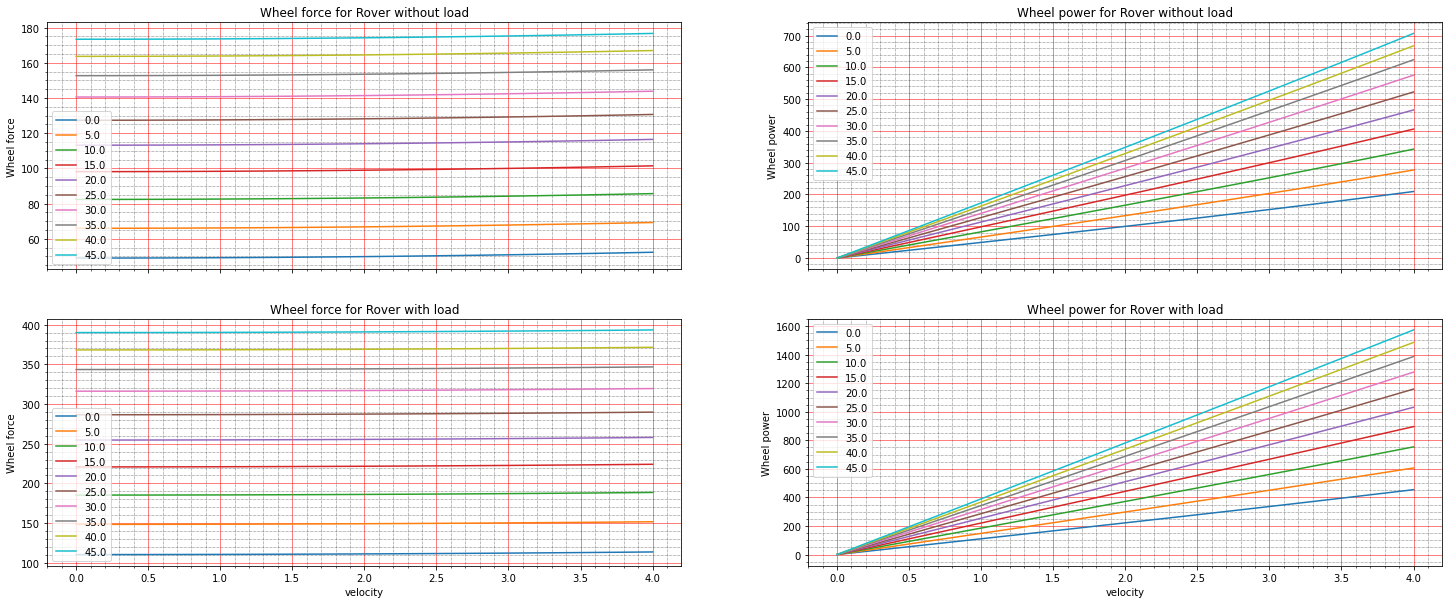

In [7]:
wheel_forces_without_load = []
wheel_power_without_load = []

wheel_forces_with_load = []
wheel_power_with_load = []
columns = ['velocity']

velocity_step = 0.1
for velocity in np.arange(0.0, max_velocity_flat + velocity_step,
                          velocity_step):
    
    forces_without_load = [ velocity ]
    powers_without_load = [ velocity ]

    forces_with_load = [ velocity ]
    powers_with_load = [ velocity ]

    slope_step = 5.0
    for slope in np.arange(0.0, max_hill_angle_empty + slope_step,
                           slope_step):

        slope_as_text = str(slope)
        if slope_as_text not in columns:
            columns.append(slope_as_text)

        wheel_force_without_load, power_without_load = wheel_load(
            rover_width * rover_height,
            coefficient_of_aerodynamic_drag,
            velocity,
            rover_mass_in_kg,
            coefficient_of_friction,
            slope)

        forces_without_load.append(wheel_force_without_load)
        powers_without_load.append(power_without_load)

        wheel_force_with_load, power_with_load = wheel_load(
            rover_width * rover_height,
            coefficient_of_aerodynamic_drag,
            velocity,
            rover_mass_in_kg + crate_mass_in_kg,
            coefficient_of_friction,
            slope)

        forces_with_load.append(wheel_force_with_load)
        powers_with_load.append(power_with_load)

    wheel_forces_without_load.append(forces_without_load)
    wheel_power_without_load.append(powers_without_load)

    wheel_forces_with_load.append(forces_with_load)
    wheel_power_with_load.append(powers_with_load)

force_without_load_df = pd.DataFrame(wheel_forces_without_load, columns=columns)
power_without_load_df = pd.DataFrame(wheel_power_without_load, columns=columns)

force_with_load_df = pd.DataFrame(wheel_forces_with_load, columns=columns)
power_with_load_df = pd.DataFrame(wheel_power_with_load, columns=columns)

fig, ax_group = plt.subplots(2, 2, figsize=(25, 10), sharex=True)

# unpack all the axes subplots
axs = ax_group.ravel()

force_without_load_df.plot(x='velocity', ax=axs[0])
axs[0].set_title('Wheel force for Rover without load')
axs[0].set_ylabel('Wheel force')
axs[0].set_axisbelow(True)
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='red')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

power_without_load_df.plot(x='velocity', ax=axs[1])
axs[1].set_title('Wheel power for Rover without load')
axs[1].set_ylabel('Wheel power')
axs[1].set_axisbelow(True)
axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='red')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')



force_with_load_df.plot(x='velocity', ax=axs[2])
axs[2].set_title('Wheel force for Rover with load')
axs[2].set_ylabel('Wheel force')
axs[2].set_axisbelow(True)
axs[2].minorticks_on()
axs[2].grid(which='major', linestyle='-', linewidth='0.5', color='red')
axs[2].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

power_with_load_df.plot(x='velocity', ax=axs[3])
axs[3].set_title('Wheel power for Rover with load')
axs[3].set_ylabel('Wheel power')
axs[3].set_axisbelow(True)
axs[3].minorticks_on()
axs[3].grid(which='major', linestyle='-', linewidth='0.5', color='red')
axs[3].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

## Rover arm sizing